# BBM 469 - DATA SCIENCE CAPSTONE PROJECT 
**Student Names**: Gökhan Özeloğlu - 21627557 / Ali Kayadibi - 21727432

**Instructors**: Fuat AKAL - Ahmet ALKILINÇ


## Table of Content

[Problem](#problem)   
[Data Understanding](#data_understanding)   
[Data Preparation](#data_preparation)   
[Modeling](#modeling)   
[Evaluation](#evaluation)   
[References](#references)   


## Problem <a class="anchor" id="problem"></a>

# Lower Back Pain Symptom Detection

Lower back pain can be caused by a variety of problems with any parts of the complex, interconnected network of spinal muscles, nerves, bones, discs or tendons in the lumbar spine. Typical sources of low back pain include:

* The large nerve roots in the low back that go to the legs may be irritated
* The smaller nerves that supply the low back may be irritated
* The large paired lower back muscles (erector spinae) may be strained
* The bones, ligaments or joints may be damaged
* An intervertebral disc may be degenerating

An irritation or problem with any of these structures can cause lower back pain and/or pain that radiates or is referred to other parts of the body. Many lower back problems also cause back muscle spasms, which don't sound like much but can cause severe pain and disability.

While lower back pain is extremely common, the symptoms and severity of lower back pain vary greatly. A simple lower back muscle strain might be excruciating enough to necessitate an emergency room visit, while a degenerating disc might cause only mild, intermittent discomfort.

In this project, we wanted to identify a person is normal or abnormal by features. We used **classification machine learning** models. Before creating, training, and testing models, we applied pre-processing steps to dataset. 

## Data Understanding<a class="anchor" id="data_understanding"></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Dataset_spine.csv")
df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


In [ ]:
print("Dataframe shape:", df.shape)

Dataframe shape: (310, 14)


In [ ]:
df["Unnamed: 13"].unique()

array([nan, 'Prediction is done by using binary classification.',
       'Attribute1  = pelvic_incidence  (numeric) ',
       'Attribute2 = pelvic_tilt (numeric) ',
       'Attribute3 = lumbar_lordosis_angle (numeric) ',
       'Attribute4 = sacral_slope (numeric) ',
       'Attribute5 = pelvic_radius (numeric) ',
       'Attribute6 = degree_spondylolisthesis (numeric) ',
       ' Attribute7= pelvic_slope(numeric)',
       ' Attribute8= Direct_tilt(numeric)',
       ' Attribute9= thoracic_slope(numeric)',
       ' Attribute10= cervical_tilt(numeric)',
       ' Attribute11=sacrum_angle(numeric)',
       ' Attribute12= scoliosis_slope(numeric)',
       'Attribute class {Abnormal, Normal} '], dtype=object)

Our dataset consists of **310 rows** and **14 columns**. The last column is meaningless for us. It just contains some explanations about other columns. If we discard one column, which identifies the row is normal or abnormal, there are 12 features. 

In [ ]:
column_names = df["Unnamed: 13"].unique()
df = df.drop("Unnamed: 13", axis = 1)
for i in column_names:
  print(i)

nan
Prediction is done by using binary classification.
Attribute1  = pelvic_incidence  (numeric) 
Attribute2 = pelvic_tilt (numeric) 
Attribute3 = lumbar_lordosis_angle (numeric) 
Attribute4 = sacral_slope (numeric) 
Attribute5 = pelvic_radius (numeric) 
Attribute6 = degree_spondylolisthesis (numeric) 
 Attribute7= pelvic_slope(numeric)
 Attribute8= Direct_tilt(numeric)
 Attribute9= thoracic_slope(numeric)
 Attribute10= cervical_tilt(numeric)
 Attribute11=sacrum_angle(numeric)
 Attribute12= scoliosis_slope(numeric)
Attribute class {Abnormal, Normal} 


We dropped the **"Unnamed: 13"**  column. 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Col1       310 non-null    float64
 1   Col2       310 non-null    float64
 2   Col3       310 non-null    float64
 3   Col4       310 non-null    float64
 4   Col5       310 non-null    float64
 5   Col6       310 non-null    float64
 6   Col7       310 non-null    float64
 7   Col8       310 non-null    float64
 8   Col9       310 non-null    float64
 9   Col10      310 non-null    float64
 10  Col11      310 non-null    float64
 11  Col12      310 non-null    float64
 12  Class_att  310 non-null    object 
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


Features' type is **float** and there is no missing value in dataset. That's why we do not need to data cleansing. Only class column has **object** type. We need to apply encoding for this column. 

In [ ]:
df.describe()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


In [ ]:
for i in range(2, len(column_names)-1):
    column_names[i] = column_names[i].split("=")[1].split("(")[0].strip()

column_names

array([nan, 'Prediction is done by using binary classification.',
       'pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis',
       'pelvic_slope', 'Direct_tilt', 'thoracic_slope', 'cervical_tilt',
       'sacrum_angle', 'scoliosis_slope',
       'Attribute class {Abnormal, Normal} '], dtype=object)

Modified the class names and updated the `column_names` list. 

In [ ]:
column_names[-1] = "Class_att"
df.columns = column_names[2:len(column_names)]

Changed column names with their real names. 

In [ ]:
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [ ]:
df.isnull().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope                0
Direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
sacrum_angle                0
scoliosis_slope             0
Class_att                   0
dtype: int64

In [ ]:
X = df.drop(['Class_att'], axis = 1)
Y = df['Class_att']

We split the target column and feature columns into X and Y. X stores feature columns and Y stores the target column. 

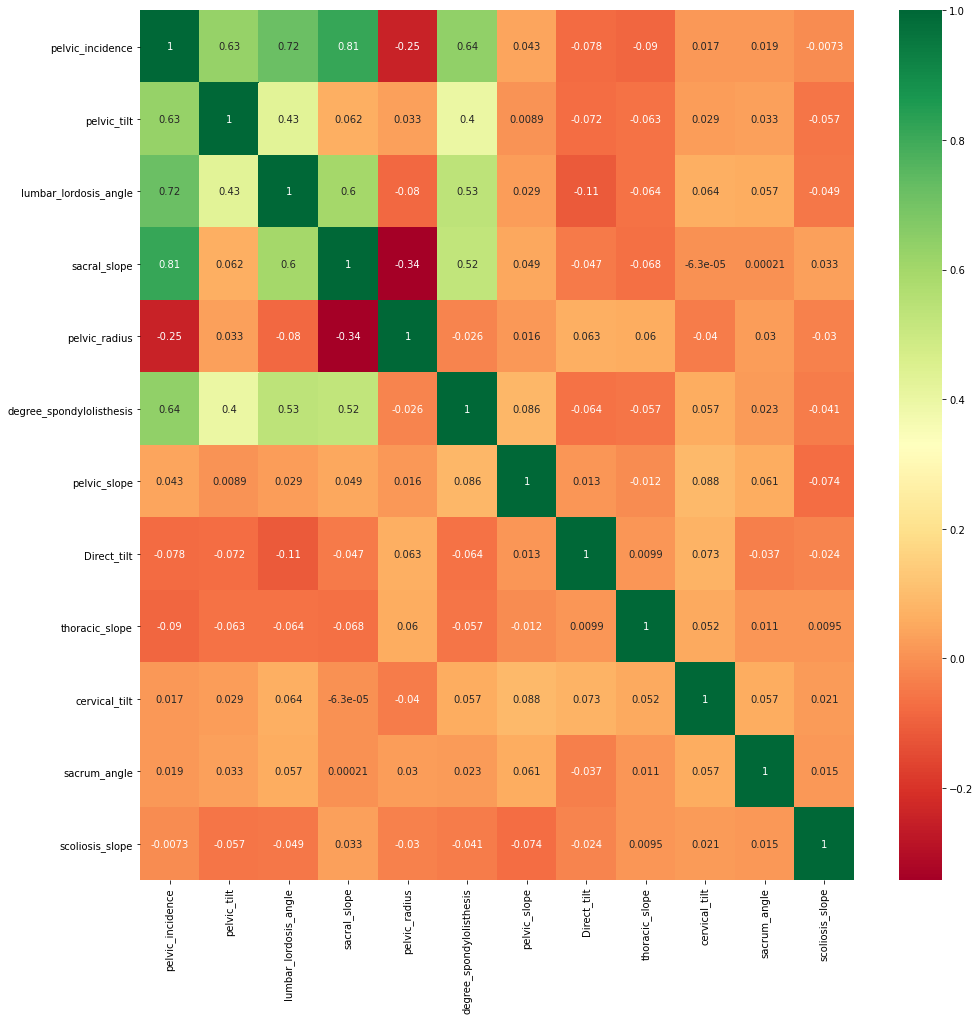

In [ ]:
corrmat = X.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(16,16))
g=sns.heatmap(X[top_corr_features].corr(),annot=True,cmap="RdYlGn")

We created correlation matrix with heatmap in `seaborn` library. Correlation matrix is a table of showing correlation between features. Features with high correlation have almost the same effect on the dependent variable. According to heatmap, we can say that some features have really high correlation like *pelvic incidence, lumbar lordosis angle, pelvic tilt*. 

In [ ]:
X

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171
...,...,...,...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192


In [ ]:
Y

0      Abnormal
1      Abnormal
2      Abnormal
3      Abnormal
4      Abnormal
         ...   
305      Normal
306      Normal
307      Normal
308      Normal
309      Normal
Name: Class_att, Length: 310, dtype: object

In [ ]:
abnormal_count = Y.to_list().count("Abnormal")
normal_count = Y.to_list().count("Normal")

print("Normal data count:", normal_count)
print("Abnormal data count:", abnormal_count)

Normal data count: 100
Abnormal data count: 210


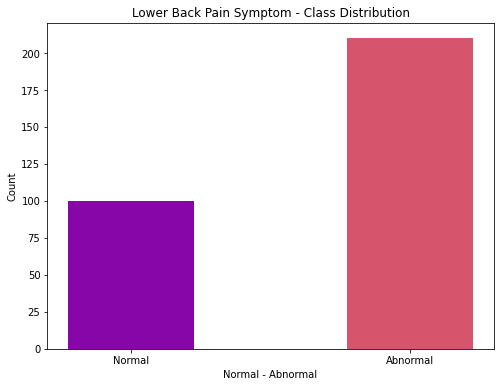

In [ ]:
plt.figure(figsize=(8,6))
plt.bar(["Normal", "Abnormal"], [normal_count, abnormal_count], width=.45, color=[plt.cm.plasma(i*70) for i in range(1, 10)])
plt.title("Lower Back Pain Symptom - Class Distribution")
plt.xlabel("Normal - Abnormal")
plt.ylabel("Count")
plt.show()

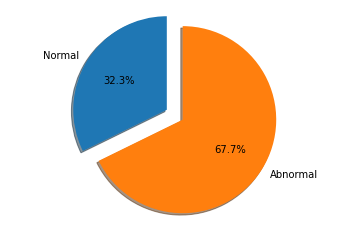

In [ ]:
N = normal_count + abnormal_count
fig1, ax1 = plt.subplots()
ax1.pie([normal_count/N, abnormal_count/N], labels=["Normal", "Abnormal"], explode=(0.1, 0.1), autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

As we can see there is almost 1/2 ratio between target attributes. There are **100 normal** and **210 abnormal** class attributes. **32.3%** of the rows are **normal**, **67.7%** of the rows are **abnormal**. 

## Data Preparation<a class="anchor" id="data_preparation"></a>

In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

labels = Y.unique()
Y= label_encoder.fit_transform(Y)

In [ ]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

k_best = SelectKBest(f_classif, k="all")
fit = k_best.fit(X, Y)
feature_scores = pd.DataFrame(fit.scores_)
feature_scores.sort_values
data_frame_columns = pd.DataFrame(X.columns)
feat_scores = pd.concat([data_frame_columns, feature_scores], axis=1)
feat_scores.columns = ["Features", "Score"]
print(feat_scores.nlargest(len(X.columns), 'Score'))


best_features = []
threshold = 10
for i,j in zip(feat_scores['Score'], feat_scores['Features']):
  if i > threshold:
    best_features.append(j)
selected_df = X[best_features]

                    Features      Score
5   degree_spondylolisthesis  75.494050
0           pelvic_incidence  43.938148
1                pelvic_tilt  36.641311
2      lumbar_lordosis_angle  33.329612
4              pelvic_radius  32.712134
3               sacral_slope  14.294805
9              cervical_tilt   3.113895
11           scoliosis_slope   1.486968
6               pelvic_slope   0.964259
8             thoracic_slope   0.752059
7                Direct_tilt   0.483532
10              sacrum_angle   0.222814


We used `SelectKBest` function for feature selection. Basically, `SelectKBest` selects the features according to the best k highest scores. We determined *treshold* as **10** to choose the features dynamically. As we can see above, some features' scores are very high whereas some features' scores are very low. We eliminated the features which have low scores. At the end, we got 6 features. These are, 

* degree_spondylolisthesis
* pelvic_incidence
* pelvic_tilt 
* lumbar_lordosis_angle 
* pelvic_radius
* sacral_slope

In [ ]:
selected_df.columns

Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(selected_df, Y, test_size=0.33, random_state=1)

In [ ]:
print("Train data size:", len(X_train))
print("Test data size:", len(X_test))

Train data size: 207
Test data size: 103


We split the dataset into train-test parts. 67% of the dataset was allocated as training data and 33% of the dataset was allocated for test data. 

In [ ]:
normalized_X_train=(X_train-X_train.min())/(X_train.max()-X_train.min())

normalized_X_test=(X_test-X_test.min())/(X_test.max()-X_test.min())

We normalized the data. Normalization is important for machine learning models, especially distance-based model. Such machine learning models perform better or converge faster when normalization is applied to data. Example of algorithms include:

* Linear regression
* Logistic regression 
* Neural networks
* Support vector machines with radial bias kernel functions
* Linear discrimant analysis

All features are in float type, so we applied normalization for all features. 

In [ ]:
model_scores = []
model_f1_scores = []
model_recall_scores = []
model_presicion_scores = []

## Modeling<a class="anchor" id="modeling"></a>

## Desisicon Tree Classifier 

Decision trees are a non-parametric supervised learning model for classificaiton and regression. It has some advantages for using it. It requires little data preparation. For example, normalization of the data does not so much effect the results positively. Also, it can handle both numerical and categorical data. 

Firstly, we created default `DecisionTreeClassifier` model. Then, the model was trained with `X_train` and `y_train`. After that we tested our trained model with unseen `X_test` data. We obtained the some evaluation metrics like *accurracy*, *precision*, *AUC score*. Also, we draw the confusion matrix. Confusion matrix is a good way to see **true-positive** and **false-positive**. 

Accuracy: 0.7961165048543689


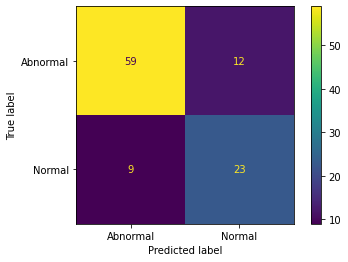

In [ ]:
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

clf_dt = tree.DecisionTreeClassifier()
clf_dt = clf_dt.fit(X_train, y_train)

dt_pred = clf_dt.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, dt_pred))
model_scores.append(("DesicionTree", metrics.accuracy_score(y_test, dt_pred)))
model_f1_scores.append(("DesicionTree", metrics.f1_score(y_test, dt_pred)))
model_recall_scores.append(("DesicionTree", metrics.recall_score(y_test, dt_pred)))
model_presicion_scores.append(("DesicionTree", metrics.precision_score(y_test, dt_pred)))


cm = confusion_matrix(y_test, dt_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels = labels)
cmd.plot()

In [ ]:
metrics.f1_score(y_test, dt_pred)

0.6865671641791045

In [ ]:
clf_dt.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')>

In [ ]:
print(metrics.classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85        71
           1       0.66      0.72      0.69        32

    accuracy                           0.80       103
   macro avg       0.76      0.77      0.77       103
weighted avg       0.80      0.80      0.80       103



In [ ]:
metrics.roc_auc_score(y_test, dt_pred, average=None)

0.774867957746479

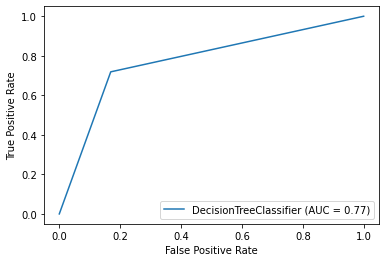

In [ ]:
metrics.plot_roc_curve(clf_dt, X_test, y_test)

An ROC curve plots True Positive Rate vs. False Positive Rate at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives.
ROC Curves are better when the True Positive Rate is close to 1 and false positive rate is close to 0. As we see here it is not looking good.

Accuracy of the model is **79%** and AUC score is **0.77**. Also, when we look at the ROC Curve, there is a gap on the top-left of the plot. Whereas precision score of the *abnormal* data is high, precision score of the *normal* data is relatively low. We can say that decision tree classifier estimates with lower success. 

## Support Vector Machine

Support vector machines(SVMs) are a set of supervised learning methods used for classification. It finds the best boundary line to separate 2 groups. 

We firstly created a `svm.SVC` model with default parameters. The model was trained with `X_train` and `y_train`. Then, we evaluated the prediction with `y_test` data. 

Accuracy: 0.8737864077669902


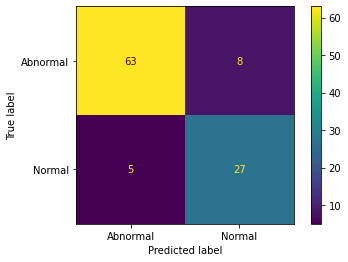

In [ ]:
from sklearn import svm

SVM = svm.SVC()
SVM.fit(X_train, y_train)
svmpred = SVM.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, svmpred))
model_scores.append(("SVM", metrics.accuracy_score(y_test, svmpred)))
model_f1_scores.append(("SVM", metrics.f1_score(y_test, svmpred)))
model_recall_scores.append(("SVM", metrics.recall_score(y_test, svmpred)))
model_presicion_scores.append(("SVM", metrics.precision_score(y_test, svmpred)))

cm3 = confusion_matrix(y_test, svmpred)
cmd3 = ConfusionMatrixDisplay(cm3, display_labels = labels)
cmd3.plot()

In [ ]:
SVM.get_params

<bound method BaseEstimator.get_params of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)>

In [ ]:
print(metrics.classification_report(y_test, svmpred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        71
           1       0.77      0.84      0.81        32

    accuracy                           0.87       103
   macro avg       0.85      0.87      0.86       103
weighted avg       0.88      0.87      0.88       103



In [ ]:
metrics.roc_auc_score(y_test, svmpred, average=None)

0.865536971830986

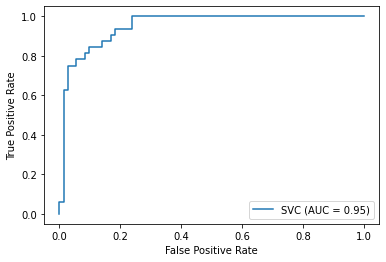

In [ ]:
metrics.plot_roc_curve(SVM, X_test, y_test)

Accuracy of the **SVM** model is **87%** and AUC score is **0.95**. SVM has more accurate results than decision tree classifier. The ROC curve plot is better. It is more close to the top-left of the plot. Also, precision score of the *abnormal* class is **0.93** and precision score of the *normal* class is **0.77**. Prediction of the true classes is higher than decision tree classifier in SVM model. In short, SVM model gives more accurate and true results for our data. 

## Gaussian Naive Bayes

Naive Bayes is a different supervised machine learning model where the algorithm is based on applying Bayes Teorem with the naive assumtion  of conditional independence between every pair of features given the value of the class variable.Bayes’ theorem states the following relationship, given class variable y and dependent feature vector $x_1$ to $x_n$. $P(y | x_1, ..., x_n) = \frac{P(y)P(x_1, ..., x_n | y)}{P(x_1, ..., x_n)}$

It can be simplified to using classification rule.

$P( y \space | \space x_1, ..., x_n) \varpropto \space P(y) \prod_{i=1}^{n}P(x_i | y) \space \Rightarrow \space \hat{y} = \underset{y}{argmaxz} P(y) \prod_{i=1}^{n}P(\space x_i | \space y) $

We firstly created a `GaussianNB()` model with default parameters. The model was trained with `X_train` and `y_train`. Then, we evaluated the prediction with `y_test` data. 

Accuracy: 0.8349514563106796


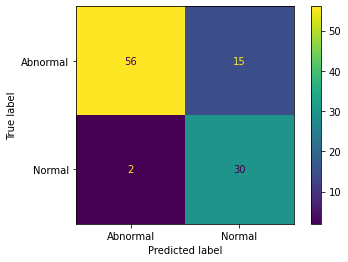

In [ ]:
from sklearn.naive_bayes import GaussianNB

naivemodel = GaussianNB()
naivemodel.fit(X_train,y_train)
naivepred = naivemodel.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, naivepred))
model_scores.append(("Gaussian Naive Bayes", metrics.accuracy_score(y_test, naivepred)))
model_f1_scores.append(("Gaussian Naive Bayes", metrics.f1_score(y_test, naivepred)))
model_recall_scores.append(("Gaussian Naive Bayes", metrics.recall_score(y_test, naivepred)))
model_presicion_scores.append(("Gaussian Naive Bayes", metrics.precision_score(y_test, naivepred)))

cm7 = confusion_matrix(y_test, naivepred)
cmd7 = ConfusionMatrixDisplay(cm7, display_labels = labels)
cmd7.plot()

In [ ]:
naivemodel.get_params

<bound method BaseEstimator.get_params of GaussianNB(priors=None, var_smoothing=1e-09)>

In [ ]:
print(metrics.classification_report(y_test, naivepred))

              precision    recall  f1-score   support

           0       0.97      0.79      0.87        71
           1       0.67      0.94      0.78        32

    accuracy                           0.83       103
   macro avg       0.82      0.86      0.82       103
weighted avg       0.87      0.83      0.84       103



In [ ]:
metrics.roc_auc_score(y_test, naivepred, average=None)

0.8631161971830987

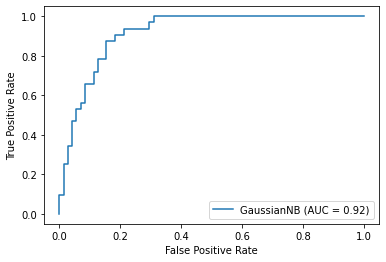

In [ ]:
metrics.plot_roc_curve(naivemodel, X_test, y_test)

Here the Naive Bayes model ROC curve is not better than SVM but it is better than Desicion Tree. In here we can see that it is starting slow than finding the sweat spot.

## Random Forest Classification

Random forests are an ensemble learning method for classification. It constructs a multitude of decision trees at training time and outputting the the class that is the mode of the classes of the individual trees. Random forests correct of the habit of overfitting to their training data of the decision tree. Each decision tree operates as an ensemble. 

Firstly, we created a `RandomForestClassifier` model with default parameters. Then, we trained and tested model with train and test data. 

Accuracy: 0.8640776699029126


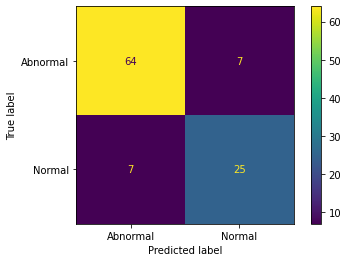

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc = rfc.fit(X_train, y_train)

pred_rfc = rfc.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, pred_rfc))
model_scores.append(("RandomForest", metrics.accuracy_score(y_test, pred_rfc)))
model_f1_scores.append(("RandomForest", metrics.f1_score(y_test, pred_rfc)))
model_recall_scores.append(("RandomForest", metrics.recall_score(y_test, pred_rfc)))
model_presicion_scores.append(("RandomForest", metrics.precision_score(y_test, pred_rfc)))


cm = confusion_matrix(y_test, pred_rfc)
cmd = ConfusionMatrixDisplay(cm, display_labels = labels)
cmd.plot()

In [ ]:
rfc.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>

In [ ]:
print(metrics.classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        71
           1       0.78      0.78      0.78        32

    accuracy                           0.86       103
   macro avg       0.84      0.84      0.84       103
weighted avg       0.86      0.86      0.86       103



In [ ]:
metrics.roc_auc_score(y_test, pred_rfc, average=None)

0.8413292253521127

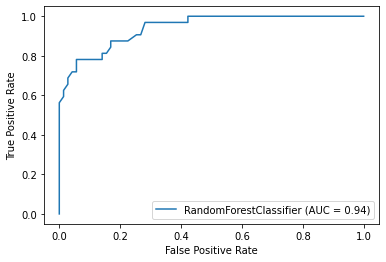

In [ ]:
metrics.plot_roc_curve(rfc, X_test, y_test)

Similar to others in performance. Accuracy of the random forest model is **86%** and AUC score is **0.94**. Random forest model is more successful than decision tree classifier. In decision tree, only one tree was trained whereas, in random forest model, multiple trees were trained. However, SVM is still more successful than random forest. Although they are even close, accuracy, AUC, and precision scores are better in SVM. Also, in ROC curve plot, line is close to top-left of the plot. But, SVM's ROC curve plot is a little bit better than random forest model. The precision score for abnormal data is better than normal data. The model predicts better for abnormal data. 

# K-Nearest Neighbors(k-NN)

The k-NN algorithm is a simple, easy-to-implement supervised machine learning model for classification. Algorithm follows the *similar things are close to each other*. In plane, similar data points are close, that's why we can say that they might be in the same group. To find the similarities, we calculate the distance between data points. Then, we sort the distances and select the *k-nearest* points. Majority of the class would be the prediction of the data point. We usually choose the odd number for *k*, because we determine the class by looking at the majority. While choosing the odd number for *k*, we guarantee that there is no equality.

We firstly created a `KNeighborsClassifier` model and then, the model was trained and tested with appropriate data. We did not change the default parameters. So, the *k* value is **5**. So, our model was trained and tested as a **5-NN** model. 



Accuracy: 0.8640776699029126


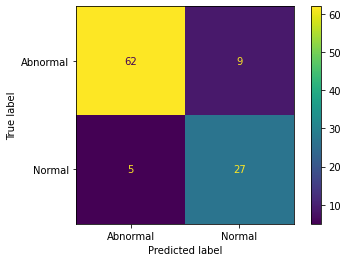

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn = knn.fit(X_train, y_train)

pred_knn = knn.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, pred_knn))
model_scores.append(("KNeighbors", metrics.accuracy_score(y_test, pred_knn)))
model_f1_scores.append(("KNeighbors", metrics.f1_score(y_test, pred_knn)))
model_recall_scores.append(("KNeighbors", metrics.recall_score(y_test, pred_knn)))
model_presicion_scores.append(("KNeighbors", metrics.precision_score(y_test, pred_knn)))


cm = confusion_matrix(y_test, pred_knn)
cmd = ConfusionMatrixDisplay(cm, display_labels = labels)
cmd.plot()

In [ ]:
knn.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')>

In [ ]:
print(metrics.classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        71
           1       0.75      0.84      0.79        32

    accuracy                           0.86       103
   macro avg       0.84      0.86      0.85       103
weighted avg       0.87      0.86      0.87       103



In [ ]:
metrics.roc_auc_score(y_test, pred_knn, average=None)

0.8584947183098591

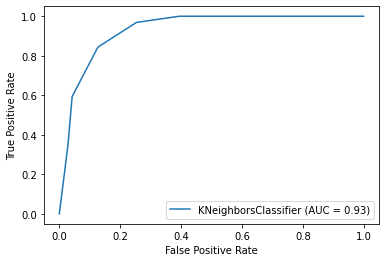

In [ ]:
metrics.plot_roc_curve(knn, X_test, y_test)

Accuracy of the model is **86%** and AUC score is **93%**. Also, precision scores are high. Results are similar to SVM and random forests model. ROC curve is close to top-left of the plot but nothing better overall performance.  There is no superiority over the SVM and random forests models. 


# Logistic Regression 

Logistic regression is used when the dependent variable(target) is categorical. Algorithm classifies the binary output data. That's why logistic regression is suitable for our dataset, because we have only 2 possible outcome, which are *normal* and *abnormal*. Logistic regression is named for the *logistic function*. The logistic function, sigmoid function, is using for determining the class. 

![img](https://miro.medium.com/max/970/1*Xu7B5y9gp0iL5ooBj7LtWw.png) 

**Sigmoid function:** $\sigma(z) = \frac{1}{1+e^{-z}}$

The values map into a value between 0 and 1. 

Accuracy: 0.883495145631068


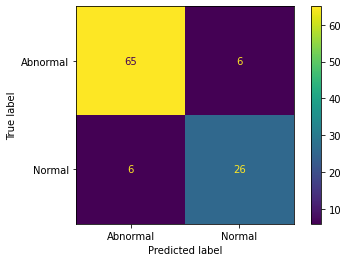

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr = lr.fit(X_train, y_train)

pred_lr = lr.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, pred_lr))
base_accuracy = metrics.accuracy_score(y_test, pred_lr)
model_scores.append(("LogisticRegression", metrics.accuracy_score(y_test, pred_lr)))
model_f1_scores.append(("LogisticRegression", metrics.f1_score(y_test, pred_lr)))
model_recall_scores.append(("LogisticRegression", metrics.recall_score(y_test, pred_lr)))
model_presicion_scores.append(("LogisticRegression", metrics.precision_score(y_test, pred_lr)))


cm = confusion_matrix(y_test, pred_lr)
cmd = ConfusionMatrixDisplay(cm, display_labels = labels)
cmd.plot()

In [ ]:
lr.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>

In [ ]:
print(metrics.classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        71
           1       0.81      0.81      0.81        32

    accuracy                           0.88       103
   macro avg       0.86      0.86      0.86       103
weighted avg       0.88      0.88      0.88       103



In [ ]:
metrics.roc_auc_score(y_test, pred_lr, average=None)

0.8639964788732395

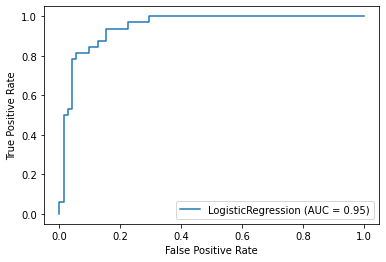

In [ ]:
metrics.plot_roc_curve(lr, X_test, y_test)

Logistic regression model is one of the best model that we tried. It has **88%** accuracy and **95%** AUC score. Also, precision scores are high. It has **92%** precision score for abnormal data points and **81%** precision score for normal data points. The data points which are classified *abnormal* is more than *normal*. So, the higher precision score can be explained non-uniformly distributed. Also, the ROC curve is close to top-left of the plot. Closer to 1.0 is better always. One of the best looking ROC Curves we had. Looking very similar to perfect models.

In [ ]:
model_scores

[('DesicionTree', 0.7961165048543689),
 ('SVM', 0.8737864077669902),
 ('Gaussian Naive Bayes', 0.8349514563106796),
 ('RandomForest', 0.8640776699029126),
 ('KNeighbors', 0.8640776699029126),
 ('LogisticRegression', 0.883495145631068)]

In [ ]:
acc = []
name = []
for x in model_scores:
  acc.append(x[1])
  name.append(x[0])

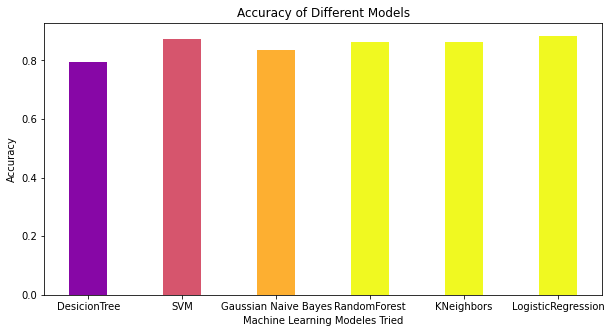

In [ ]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(name, acc, color=[plt.cm.plasma(i*70) for i in range(1, 10)],
        width = 0.4)
 
plt.xlabel("Machine Learning Modeles Tried")
plt.ylabel("Accuracy")
plt.title("Accuracy of Different Models")
plt.show()

In [ ]:
acc = []
name = []
for x in model_f1_scores:
  acc.append(x[1])
  name.append(x[0])

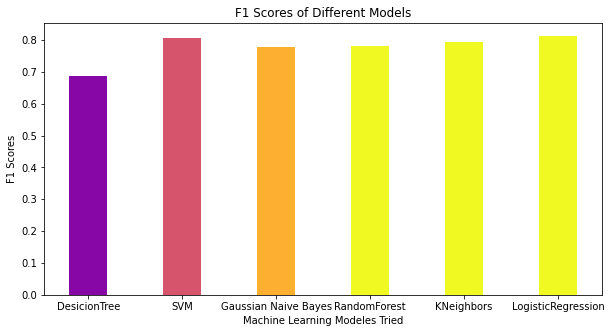

In [ ]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(name, acc, color=[plt.cm.plasma(i*70) for i in range(1, 10)],
        width = 0.4)
 
plt.xlabel("Machine Learning Modeles Tried")
plt.ylabel("F1 Scores")
plt.title("F1 Scores of Different Models")
plt.show()

In [ ]:
acc = []
name = []
for x in model_recall_scores:
  acc.append(x[1])
  name.append(x[0])

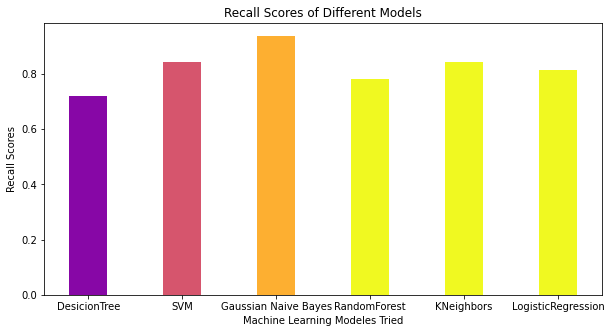

In [ ]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(name, acc, color=[plt.cm.plasma(i*70) for i in range(1, 10)],
        width = 0.4)
 
plt.xlabel("Machine Learning Modeles Tried")
plt.ylabel("Recall Scores")
plt.title("Recall Scores of Different Models")
plt.show()

In [ ]:
acc = []
name = []
for x in model_presicion_scores:
  acc.append(x[1])
  name.append(x[0])

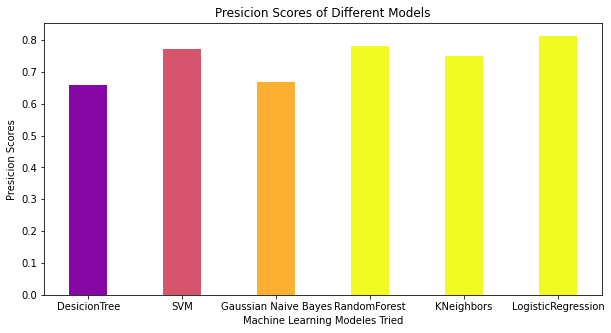

In [ ]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(name, acc, color=[plt.cm.plasma(i*70) for i in range(1, 10)],
        width = 0.4)
 
plt.xlabel("Machine Learning Modeles Tried")
plt.ylabel("Presicion Scores")
plt.title("Presicion Scores of Different Models")
plt.show()

## Evaluation<a class="anchor" id="evaluation"></a>

After selecting Logical Regression as our base model, we have decided to improve our model by applying Hyperparameter Tuning to the model. We have 2 options to improve a model in machine learning. First one is with gathering more data and performing feature engineering. Other way is with playing parameters and peforming hyperparameter tuning. We have focused on finding better parameters for our model. 

To do this we have used GridSearchCv to train bunch of different models with different parameters, than select the best model which has the best mean test score. What GridSearchCv does is, it creates bunch of new models with the parameters we defined above, so that for the given range of values, differents models are evaluated and the best is selected and it returned the parameters of the best model.

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.832222 using {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.830635 (0.086652) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.830635 (0.086652) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.832222 (0.082846) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.830635 (0.086652) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.830635 (0.086652) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.826190 (0.084777) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.830635 (0.086652) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.830635 (0.086652) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.787143 (0.098220) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.829048 (0.086588) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.829048 (0.086588) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.780714 (0.099967) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.827540 (0.088840) wit

Accuracy: 0.8932038834951457


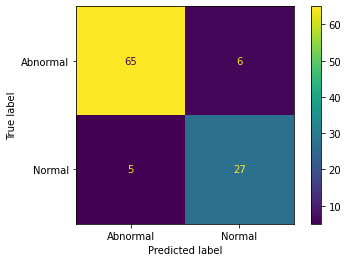

In [ ]:
lr = LogisticRegression(C = 100.0, penalty='l2', solver = 'liblinear')

lr = lr.fit(X_train, y_train)

pred_lr = lr.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, pred_lr))
grid_accuracy = metrics.accuracy_score(y_test, pred_lr)
#model_f1_scores.append(("LogisticRegression", metrics.f1_score(y_test, pred_lr)))
#model_recall_scores.append(("LogisticRegression", metrics.recall_score(y_test, pred_lr)))
#model_presicion_scores.append(("LogisticRegression", metrics.precision_score(y_test, pred_lr)))


cm = confusion_matrix(y_test, pred_lr)
cmd = ConfusionMatrixDisplay(cm, display_labels = labels)
cmd.plot()

After finding the model with best parameters, we are comparing it with the base model we have used above and we are finding the improvement between the accuracy of these two models.

In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of 1.10%.


We got some improvement. It may seem small but this is because of our data is not that big. In bigger projects this will have so much more impact on the accuracy of the model and Hyperparameter tuning will have so much impact.

In [ ]:
lr.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)>

In [ ]:
print(metrics.classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92        71
           1       0.82      0.84      0.83        32

    accuracy                           0.89       103
   macro avg       0.87      0.88      0.88       103
weighted avg       0.89      0.89      0.89       103



In [ ]:
metrics.roc_auc_score(y_test, pred_lr, average=None)

0.8796214788732395

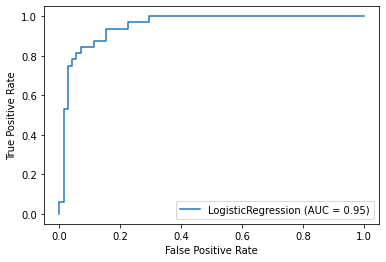

In [ ]:
metrics.plot_roc_curve(lr, X_test, y_test)

## References<a class="anchor" id="references"></a>

[1] https://www.kaggle.com/sammy123/lower-back-pain-symptoms-dataset 

[2] https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

[3] https://scikit-learn.org/stable/modules/tree.html

[4] https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

[5] https://scikit-learn.org/stable/modules/svm.html

[6] https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

[7] https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

[8] https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

[9] https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes

[10] https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc

[11] https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/


**Disclaimer!** <font color='grey'>This notebook was prepared by Gökhan Özeloğlu and Ali Kayadibi as a term project for the *BBM469 - Data Intensive Applications Laboratory* class. The notebook is available for educational purposes only. There is no guarantee on the correctness of the content provided as it is a student work.

If you think there is any copyright violation, please let us [know](https://forms.gle/BNNRB2kR8ZHVEREq8). 
</font>